In [58]:
import pandas as pd
import os

#### 此次主要分析主页发帖任务中，出现错误发帖占总发帖的比例以及不同错误的分布情况，并以表格和图的形式展现结果，首先载入并处理数据。

In [98]:
files = [x for x in os.listdir('.') if x.endswith('.csv')]

error_rate_dict = {}
error_distribution_to_total_dict = {}
error_distribution_dict = {}
total_count_dict = {}
error_count_dict = {}

for file in files:
    name = file.split('.csv')[0]
    df = pd.read_csv(file)
    publishing_error = df[df['Status'].str.contains('Error publishing a Post')]
    publishing_total = df[df['Status'].str.contains('\*FINALIZED\* a post')]
    
    total_count = publishing_total.Status.count()
    error_count = publishing_error.Status.count()
    error_rate = round(error_count / total_count, 2)
    
    publishing_error = publishing_error.copy()
    publishing_error['Code'] = publishing_error['Status'].apply(lambda x: x.split(',')[0].split(':')[1].split('-')[0].strip())
    
    code_count = publishing_error.groupby(['Code'])['Status'].count()
    
    error_rate_dict[name] = error_rate
    total_count_dict[name] = total_count
    error_count_dict[name] = error_count
    error_distribution_dict[name] = code_count / publishing_error['Code'].count()
    error_distribution_to_total_dict[name] = code_count / publishing_total['Status'].count()

In [99]:
files

['151.106.35.202 U43_page_post_logs_tony.csv',
 '151.106.35.221 U43_pages_post_logs_tony.csv',
 '151_106_42_145GEN_R49_pages_post_logs_aidan.csv',
 '18U45-10 page_post_logs_aaron.csv',
 'b8 151.106.41.12  page_post_logs_cary.csv']

In [100]:
group_joiner_dict = {}

for file in files:
    name = file.split('.csv')[0]
    df = pd.read_csv(file)
    
    filter_finished = df[df['Status'].str.contains('Group Joiner') & df['Status'].str.contains('Finished operation')]
    filter_error = df[df['Status'].str.contains('Group Joiner') & df['Status'].str.contains('Error')]
    
    df_finished_count = df_finished.groupby('Account')['Status'].count()
    df_error_count = df_error.groupby('Account')['Status'].count()
    
    df_total_count = pd.concat([df_finished_count, df_error_count], axis=1).fillna(0)
    df_total_count.columns = ['Finished Amount', 'Error Amount']
    df_total_count['Total Amount'] = df_total_count.sum(1)
    df_total_count['Success Rate'] = df_total_count['Finished Amount'] / df_total_count['Total Amount']
    
    group_joiner_dict[name] = df_total_count

In [101]:
group_joiner_dict

{'151.106.35.202 U43_page_post_logs_tony':                      Finished Amount  Error Amount  Total Amount  Success Rate
 Oliver_Malaysia_421            100.0           0.0         100.0      1.000000
 Oliver_Malaysia_422            134.0           2.0         136.0      0.985294
 Oliver_Malaysia_423            147.0           0.0         147.0      1.000000
 Oliver_Malaysia_424            147.0           1.0         148.0      0.993243
 Oliver_Malaysia_425            140.0           0.0         140.0      1.000000
 ...                              ...           ...           ...           ...
 Oliver_Malaysia_487            100.0           0.0         100.0      1.000000
 Oliver_Malaysia_488            100.0           0.0         100.0      1.000000
 Oliver_Malaysia_489            100.0           0.0         100.0      1.000000
 Oliver_Malaysia_490             78.0         428.0         506.0      0.154150
 Oliver_Malaysia_470              0.0         569.0         569.0      0.00000

In [102]:
data_list = [key for key in group_joiner_dict.keys()]

In [103]:
for 

SyntaxError: invalid syntax (<ipython-input-103-eaf083cb72bb>, line 1)

In [104]:
group_joiner_data = pd.concat(data_list)

TypeError: cannot concatenate object of type '<class 'str'>'; only Series and DataFrame objs are valid

In [105]:
group_joiner_data

,Finished Amount,Error Amount,Total Amount,Success Rate
Gen_Malaysia1,3.0,26.0,29.0,0.103448
Gen_Malaysia11,3.0,24.0,27.0,0.111111
Gen_Malaysia12,29.0,0.0,29.0,1.000000
Gen_Malaysia13,29.0,0.0,29.0,1.000000
Gen_Malaysia14,3.0,19.0,22.0,0.136364
...,...,...,...,...
Oliver_Malaysia_487,100.0,0.0,100.0,1.000000
Oliver_Malaysia_488,100.0,0.0,100.0,1.000000
Oliver_Malaysia_489,100.0,0.0,100.0,1.000000
Oliver_Malaysia_490,78.0,428.0,506.0,0.154150


In [106]:
group_joiner_data.describe()

,Finished Amount,Error Amount,Total Amount,Success Rate
count,294.000000,294.000000,294.000000,294.000000
mean,47.159864,32.517007,79.676871,0.764662
std,44.874778,97.964426,115.739620,0.367005
min,0.000000,0.000000,11.000000,0.000000
25%,28.250000,0.000000,29.000000,0.500000
50%,29.000000,0.000000,33.000000,1.000000
75%,43.000000,14.000000,76.750000,1.000000
max,147.000000,573.000000,604.000000,1.000000


In [107]:
success_rate_data = pd.DataFrame(group_joiner_data['Success Rate'])

In [108]:
success_rate_data

,Success Rate
Gen_Malaysia1,0.103448
Gen_Malaysia11,0.111111
Gen_Malaysia12,1.000000
Gen_Malaysia13,1.000000
Gen_Malaysia14,0.136364
...,...
Oliver_Malaysia_487,1.000000
Oliver_Malaysia_488,1.000000
Oliver_Malaysia_489,1.000000
Oliver_Malaysia_490,0.154150


<AxesSubplot:ylabel='Frequency'>

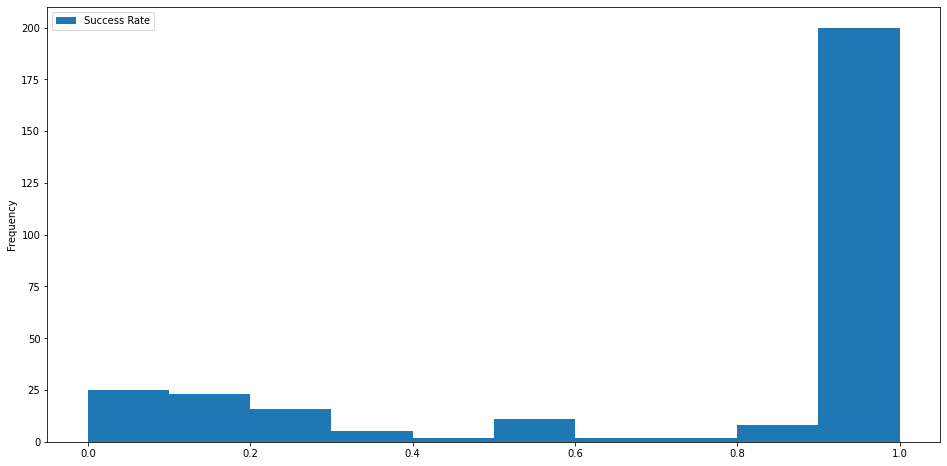

In [109]:
success_rate_data.plot(kind='hist', figsize=(16, 8))

In [110]:
group_joiner_error_dict

{}

#### 接下来将每个发帖活动的总发帖数量、总错误量、错误率以表格的形式展现，并计算各自的统计数据。

In [111]:
count_data = pd.DataFrame([total_count_dict, error_count_dict, error_rate_dict],
                                index=['number of post', 'number of error', 'error rate']).T
count_data

,number of post,number of error,error rate
151.106.35.202 U43_page_post_logs_tony,946.0,504.0,0.53
151.106.35.221 U43_pages_post_logs_tony,1672.0,791.0,0.47
151_106_42_145GEN_R49_pages_post_logs_aidan,1528.0,886.0,0.58
18U45-10 page_post_logs_aaron,252.0,130.0,0.52
b8 151.106.41.12 page_post_logs_cary,647.0,377.0,0.58


In [112]:
count_data.describe()

,number of post,number of error,error rate
count,5.000000,5.000000,5.000000
mean,1009.000000,537.600000,0.536000
std,595.187365,307.674016,0.046152
min,252.000000,130.000000,0.470000
25%,647.000000,377.000000,0.520000
50%,946.000000,504.000000,0.530000
75%,1528.000000,791.000000,0.580000
max,1672.000000,886.000000,0.580000


#### 下面计算所有发帖活动的发帖总量和错误总量，并将每个发帖活动的错误率数据可视化。

In [113]:
count_data.iloc[:,0:2].sum()

number of post     5045.0
number of error    2688.0
dtype: float64

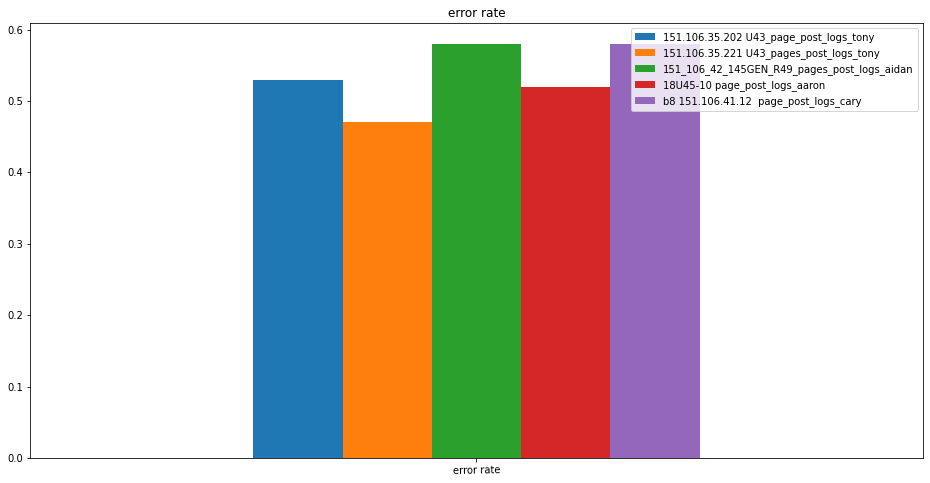

In [114]:
error_rate_data = pd.DataFrame(error_rate_dict, index=['error rate'])
error_rate_plot = error_rate_data.plot(kind='bar', figsize=(16, 8), title='error rate', rot=True)

#### 接下来展示4个主页发帖任务中，不同错误的占比，并将其数据画图。

In [115]:
error_distribution = pd.DataFrame(error_distribution_dict).fillna(0)
error_distribution.T

,code 0,code 101,code 102,code 103,code 121,code 168,code 3,code 55,code 81
151.106.35.202 U43_page_post_logs_tony,0.003968,0.007937,0.000000,0.023810,0.003968,0.359127,0.085317,0.515873,0.000000
151.106.35.221 U43_pages_post_logs_tony,0.003793,0.010114,0.000000,0.021492,0.005057,0.288243,0.021492,0.614412,0.035398
151_106_42_145GEN_R49_pages_post_logs_aidan,0.000000,0.000000,0.001129,0.002257,0.011287,0.091422,0.006772,0.887133,0.000000
18U45-10 page_post_logs_aaron,0.015385,0.007692,0.000000,0.000000,0.000000,0.584615,0.015385,0.376923,0.000000
b8 151.106.41.12 page_post_logs_cary,0.021220,0.000000,0.000000,0.000000,0.005305,0.082228,0.000000,0.891247,0.000000


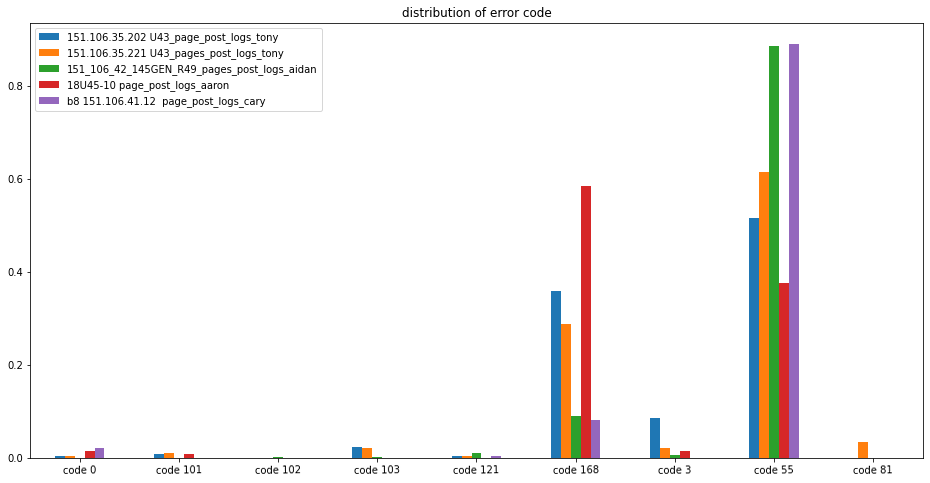

In [116]:
error_distribution_plot = error_distribution.plot(kind='bar', figsize=(16, 8), title='distribution of error code', rot=True)

#### 下面看下不同错误的数量相对于发帖总数的比例，并将其数据画图。

In [117]:
error_distribution_to_total = pd.DataFrame(error_distribution_to_total_dict).fillna(0)
error_distribution_to_total.T

,code 0,code 101,code 102,code 103,code 121,code 168,code 3,code 55,code 81
151.106.35.202 U43_page_post_logs_tony,0.002114,0.004228,0.000000,0.012685,0.002114,0.191332,0.045455,0.274841,0.000000
151.106.35.221 U43_pages_post_logs_tony,0.001794,0.004785,0.000000,0.010167,0.002392,0.136364,0.010167,0.290670,0.016746
151_106_42_145GEN_R49_pages_post_logs_aidan,0.000000,0.000000,0.000654,0.001309,0.006545,0.053010,0.003927,0.514398,0.000000
18U45-10 page_post_logs_aaron,0.007937,0.003968,0.000000,0.000000,0.000000,0.301587,0.007937,0.194444,0.000000
b8 151.106.41.12 page_post_logs_cary,0.012365,0.000000,0.000000,0.000000,0.003091,0.047913,0.000000,0.519320,0.000000


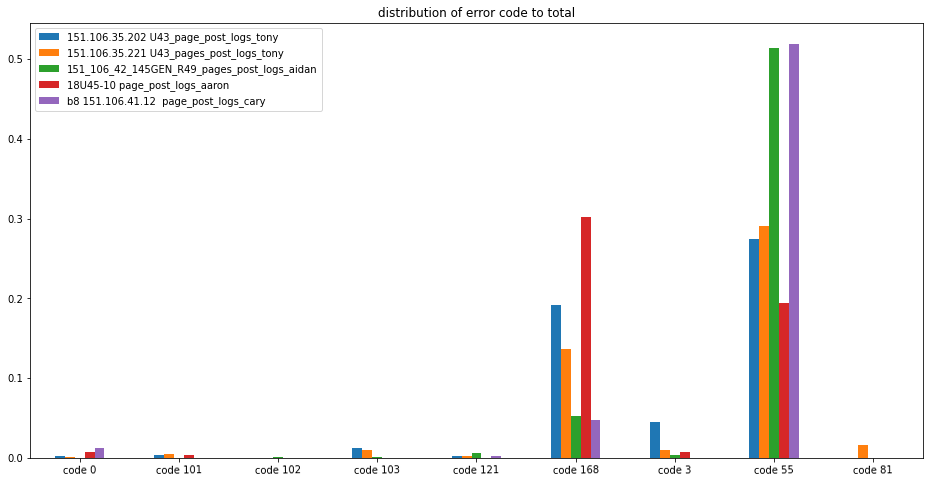

In [118]:
error_distribution_to_total_plot = error_distribution_to_total.plot(kind='bar', figsize=(16, 8), rot=True,
                                                                    title='distribution of error code to total')

#### 从以上的数据分析可以看出，错误发帖量占总发帖量的占比为40%-60%之间，在所有错误发帖中数量占比最高的错误为code 55，code 55数量占总错误量的比例40%-90%之间，code 55数量相对于发帖总数的比例在20%-50%之间，其中错误占比第二高的错误为code 168，此类错误为超时错误，主要由于服务器CPU负载过高或者账号网络太差造成，此类错误可以通过优化CPU负载和账号网络降低错误比例，code 55错误为Facebook群限制Facebook主页在群里发帖和评论，从而导致的发帖错误，此错误受Facebook群的设置限制，非发帖操作能解决。